# Titanic

O dataset foi retirado da competição do Kaggle e a primeira análise seguido do tutorial da própria plataforma.

link dataset <li>https://www.kaggle.com/c/titanic/data</li>

link tutorial <li> https://www.kaggle.com/alexisbcook/titanic-tutorial</li>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Conhecendo o dataset

### Data Dictionary
<ul style='font-size: 14px; line-height: 2; text-align: justify;'>
<li><b>Survived</b> - O = No Survived and 1 = Survived</li>
<li><b>Pclass</b> - 1 = 1st, 2 = 2nd and 3 = 3rd</li>
<li><b>Sex</b> - Gender</li>
<li><b>Age</b> - Age in Years</li>
<li><b>SibSb</b> - # of siblings / spouses aboard the Titanic</li>
<li><b>Parch</b> - # of parents / children aboard the Titanic</li>
<li><b>Ticket</b> - Ticket Number</li>
<li><b>Fare</b> - Passenger fare</li>
<li><b>Cabin</b> - Cabin Number</li>
<li><b>Embarked</b> - Port of Embarkation: C = Cherbourg, Q = Queenstown and S = Southampton</li></ul>
    
### Variable Notes
<ul style='font-size: 14px; line-height: 2; text-align: justify;'>
<b>Pclass:</b> A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

<b>Age:</b> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<b>Sibsp:</b> The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

<b>Parch:</b> The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [7]:
train_data.corr().round(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0000,-0.0050,-0.0351,0.0368,-0.0575,-0.0017,0.0127
Survived,-0.0050,1.0000,-0.3385,-0.0772,-0.0353,0.0816,0.2573
Pclass,-0.0351,-0.3385,1.0000,-0.3692,0.0831,0.0184,-0.5495
Age,0.0368,-0.0772,-0.3692,1.0000,-0.3082,-0.1891,0.0961
SibSp,-0.0575,-0.0353,0.0831,-0.3082,1.0000,0.4148,0.1597
Parch,-0.0017,0.0816,0.0184,-0.1891,0.4148,1.0000,0.2162
Fare,0.0127,0.2573,-0.5495,0.0961,0.1597,0.2162,1.0000


# Analise Exploratória dos dados

Conhecendo algumas variaveis sem nenhuma modificação.

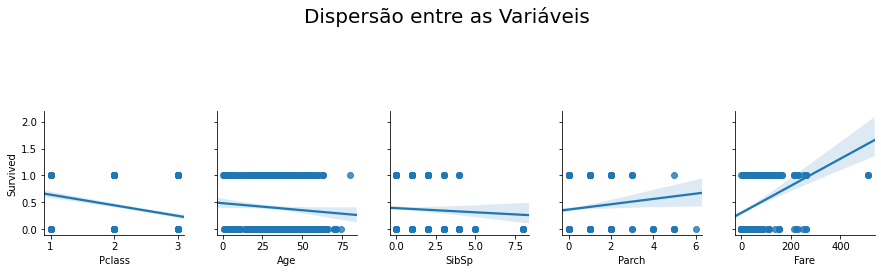

In [8]:
ax = sns.pairplot(train_data, y_vars='Survived', x_vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.5)
ax

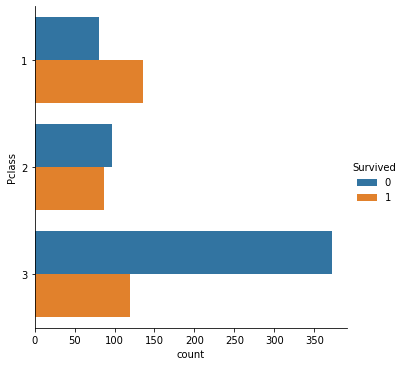

In [9]:
sns.catplot(y="Pclass", hue="Survived", kind="count", data=train_data)

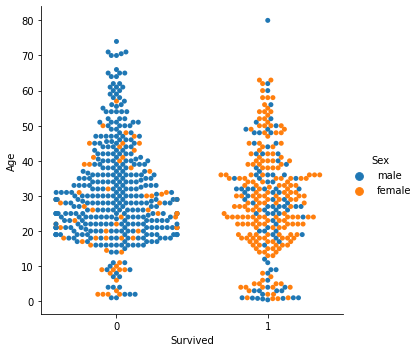

In [10]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="swarm", data=train_data)


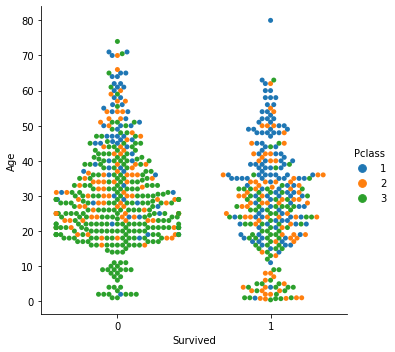

In [11]:
sns.catplot(x="Survived", y="Age", hue="Pclass", kind="swarm", data=train_data)


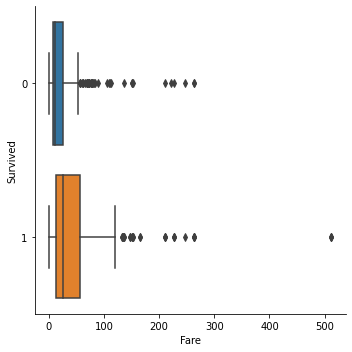

In [12]:
sns.catplot(x="Fare", y="Survived",orient="h", kind="box", data=train_data)


# Treinando o modelo

Primeiro Modelo com os dados originais do dataset.

In [13]:
y = train_data["Survived"]

In [14]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [15]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [16]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
